In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns

In [ ]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual name of your dataset file
dataset_path = '/content/drive/My Drive/AirQualityUCI.csv'
# Read the dataset into a DataFrame
df = pd.read_csv(dataset_path, delimiter=';')

# Display the first few rows of the DataFrame
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
print(df.describe())

       PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.000000  -200.000000     895.000000   141.000000    794.000000   
75%    1221.000000  -200.000000    1105.000000   284.000000    960.000000   
max    2040.000000  1189.000000    2214.000000  1479.000000   2683.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  Unnamed: 15  Unnamed: 16  
count  9357.000000   9357.000000  9357.000000          0.0          0.0  
mean     58.148873   1391.479641   975.072032          NaN          NaN  
std     126.940455    467.210125   456.938184          NaN          NaN  
min    -20

In [ ]:
df = df.dropna(axis=1, how='all')

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [ ]:
df = df[df['CO(GT)'] != -200]

In [ ]:
print(df.describe())

       PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.000000  -200.000000     895.000000   141.000000    794.000000   
75%    1221.000000  -200.000000    1105.000000   284.000000    960.000000   
max    2040.000000  1189.000000    2214.000000  1479.000000   2683.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  
count  9357.000000   9357.000000  9357.000000  
mean     58.148873   1391.479641   975.072032  
std     126.940455    467.210125   456.938184  
min    -200.000000   -200.000000  -200.000000  
25%      53.000000   1185.000000   700.000000  
50%      96.000000

<ipython-input-76-9a826575bb2f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO(GT)'] = pd.to_numeric(df['CO(GT)'].str.replace(',', '.'), errors='coerce')


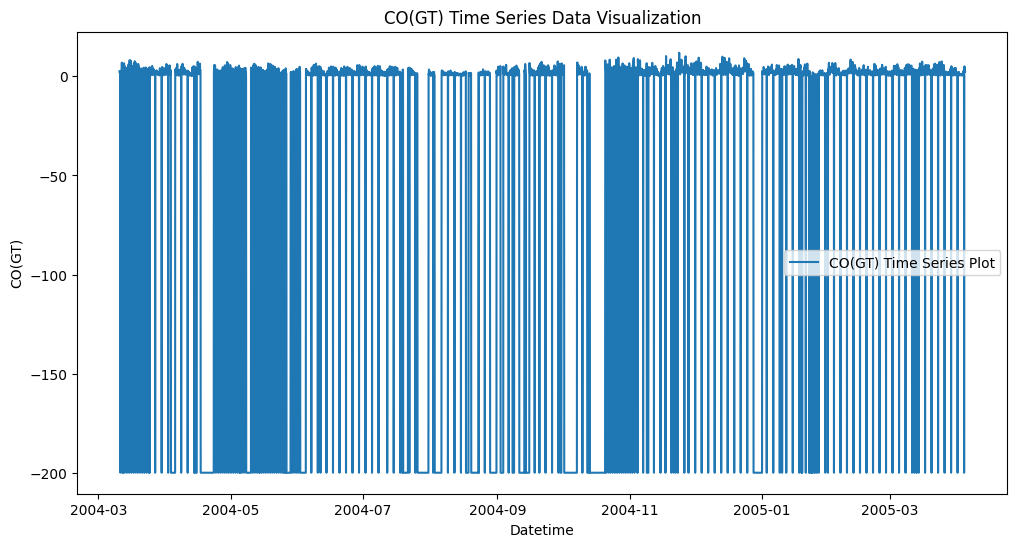

In [ ]:

df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

df['Datetime'] = df['Date'] + ' ' + df['Time']

df['Datetime'].replace('nan nan', pd.NaT, inplace=True)

df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce', format='%d/%m/%Y %H.%M.%S')

df = df.dropna(subset=['Datetime'])

df['CO(GT)'] = pd.to_numeric(df['CO(GT)'].str.replace(',', '.'), errors='coerce')

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['CO(GT)'], label='CO(GT) Time Series Plot')
plt.xlabel('Datetime')
plt.ylabel('CO(GT)')
plt.title('CO(GT) Time Series Data Visualization')
plt.legend()
plt.show()


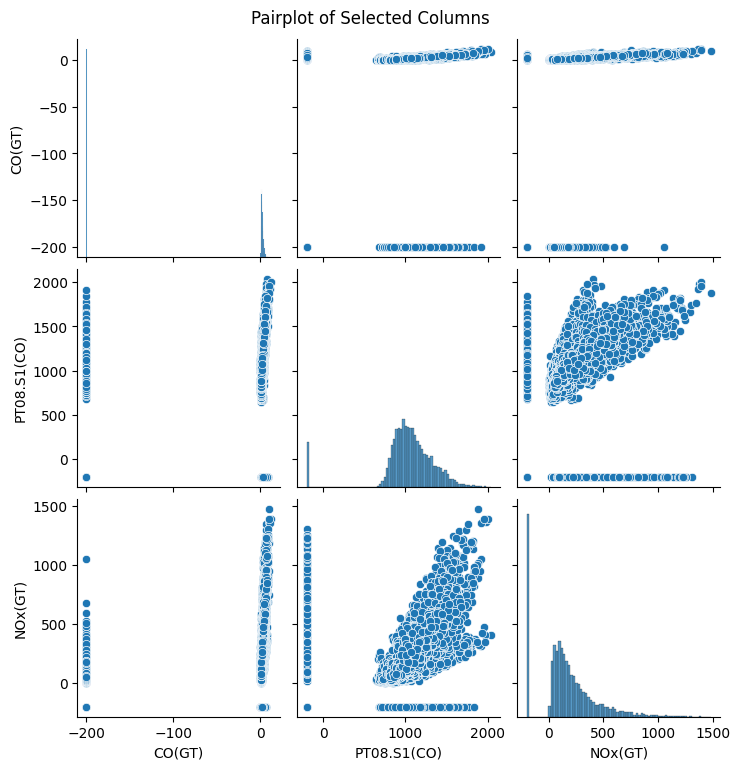

In [ ]:
selected_columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'NOx(GT)', 'T', 'RH', 'AH']
sns.pairplot(df[selected_columns])
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

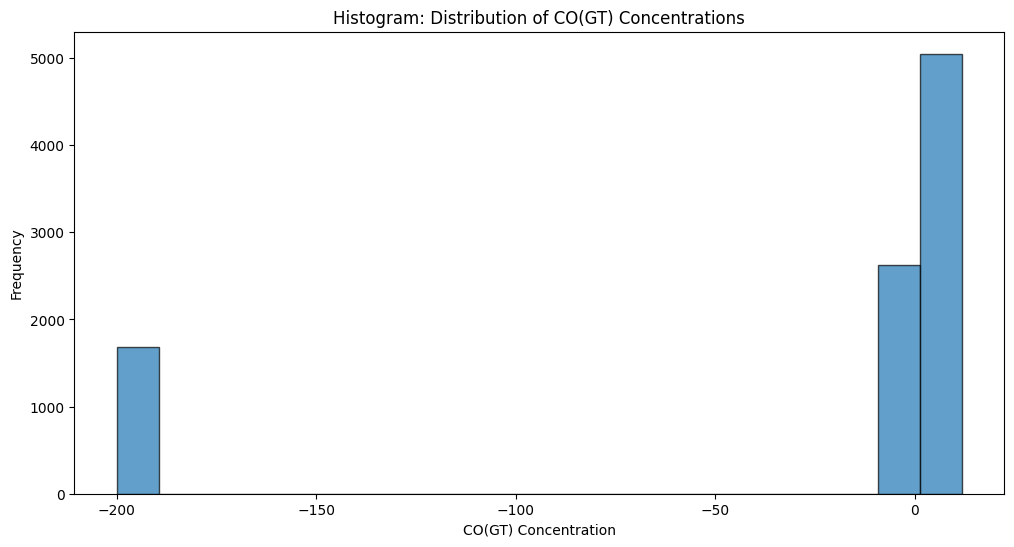

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['CO(GT)'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('CO(GT) Concentration')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of CO(GT) Concentrations')
plt.show()

<ipython-input-79-edbe2dd61caa>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[selected_columns].corr()


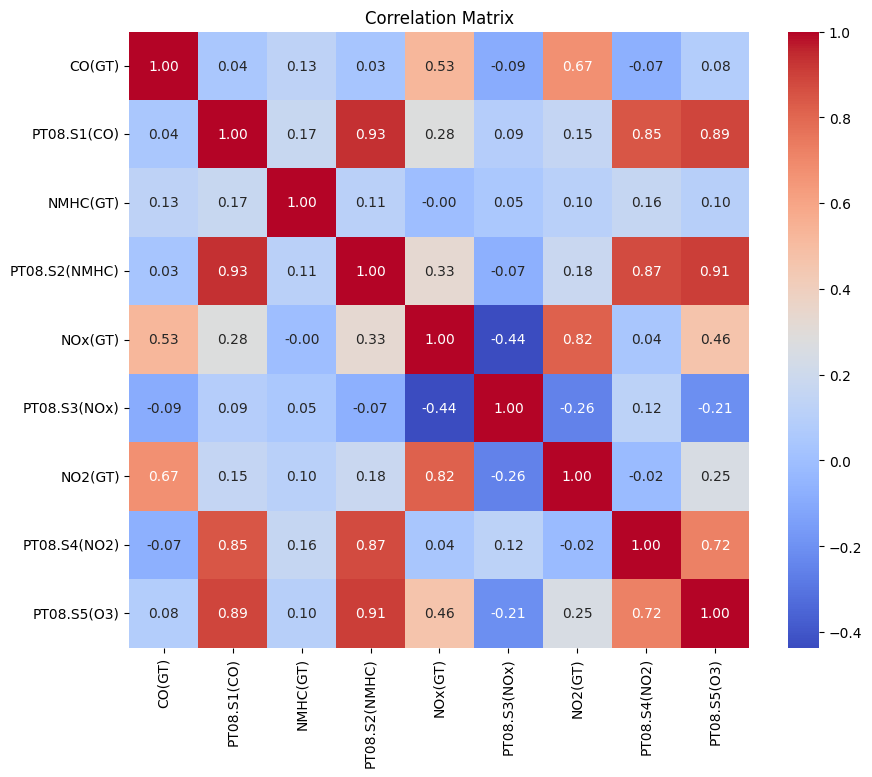

In [ ]:
selected_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

# create a correlation matrix
correlation_matrix = df[selected_columns].corr()

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df[selected_columns] = df[selected_columns].replace(',', '.', regex=True)
df[selected_columns] = df[selected_columns].apply(pd.to_numeric, errors='coerce')

df = df.dropna()

# Normalizing and splitting the datset
scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [ ]:
X = df[selected_columns]
y = df['CO(GT)']

# splitting into training, validation, and test dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# printing shapes of dataset
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (7485, 13) (7485,)
Validation set shape: (936, 13) (936,)
Testing set shape: (936, 13) (936,)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [ ]:
class MyRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(MyRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# dataloader creation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
num_layers = 3

model = MyRNN(input_size, hidden_size, output_size, num_layers)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [ ]:
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(1))
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        train_loss = criterion(model(X_train_tensor.unsqueeze(1)), y_train_tensor)
        val_loss = criterion(model(X_val_tensor.unsqueeze(1)), y_val_tensor)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch 1/50, Training Loss: 0.4901, Validation Loss: 0.4895
Epoch 2/50, Training Loss: 0.3861, Validation Loss: 0.3857
Epoch 3/50, Training Loss: 0.2947, Validation Loss: 0.2944
Epoch 4/50, Training Loss: 0.2200, Validation Loss: 0.2197
Epoch 5/50, Training Loss: 0.1657, Validation Loss: 0.1655
Epoch 6/50, Training Loss: 0.1328, Validation Loss: 0.1328
Epoch 7/50, Training Loss: 0.1159, Validation Loss: 0.1159
Epoch 8/50, Training Loss: 0.1083, Validation Loss: 0.1084
Epoch 9/50, Training Loss: 0.1042, Validation Loss: 0.1043
Epoch 10/50, Training Loss: 0.1012, Validation Loss: 0.1012
Epoch 11/50, Training Loss: 0.0982, Validation Loss: 0.0982
Epoch 12/50, Training Loss: 0.0949, Validation Loss: 0.0950
Epoch 13/50, Training Loss: 0.0914, Validation Loss: 0.0915
Epoch 14/50, Training Loss: 0.0877, Validation Loss: 0.0876
Epoch 15/50, Training Loss: 0.0835, Validation Loss: 0.0834
Epoch 16/50, Training Loss: 0.0790, Validation Loss: 0.0789
Epoch 17/50, Training Loss: 0.0741, Validation Lo

In [ ]:
best_model_path = 'best_model_weights0.pth'
torch.save(model.state_dict(), best_model_path)

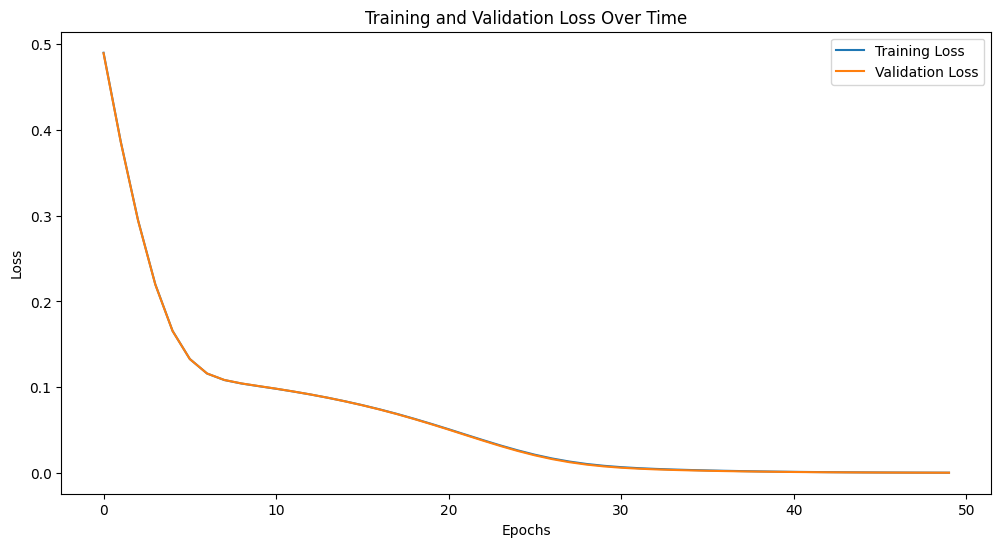

Mean Squared Error: 0.00022895804158631962
R^2 Score: 0.9982081559383736


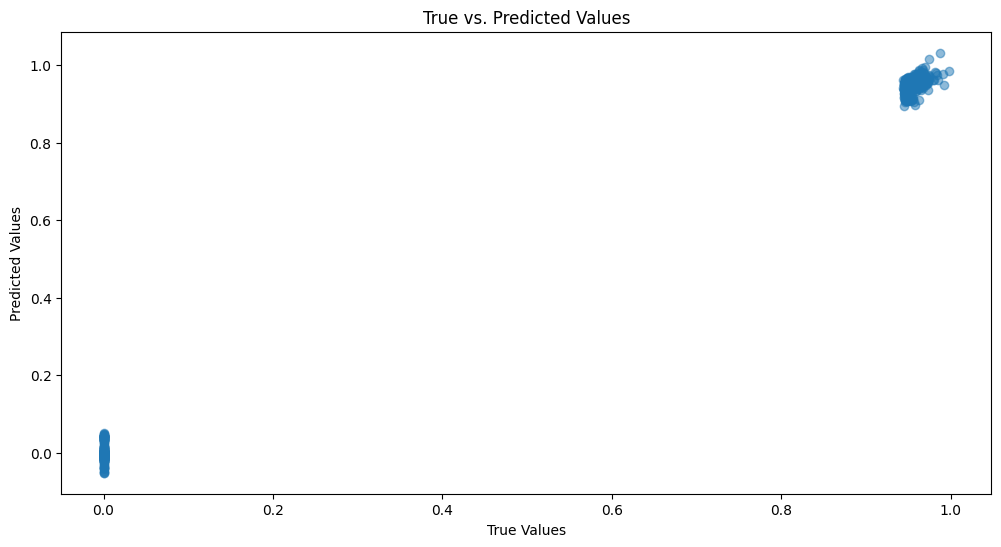

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

best_model = MyRNN(input_size, hidden_size, output_size, num_layers)
best_model.load_state_dict(torch.load(best_model_path))

best_model.eval()
with torch.no_grad():
    y_pred = best_model(X_test_tensor.unsqueeze(1)).numpy()

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Visualization predicted vs. true values
plt.figure(figsize=(12, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

Model 1 : Learning rate 0.00000001

In [ ]:
class MyRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(MyRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# dataloader creation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
num_layers = 3

model = MyRNN(input_size, hidden_size, output_size, num_layers)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00009)

In [ ]:
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(1))
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # calculating training loss
    model.eval()
    with torch.no_grad():
        train_loss = criterion(model(X_train_tensor.unsqueeze(1)), y_train_tensor)
        val_loss = criterion(model(X_val_tensor.unsqueeze(1)), y_val_tensor)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch 1/50, Training Loss: 0.1099, Validation Loss: 0.1103
Epoch 2/50, Training Loss: 0.0822, Validation Loss: 0.0824
Epoch 3/50, Training Loss: 0.0487, Validation Loss: 0.0484
Epoch 4/50, Training Loss: 0.0171, Validation Loss: 0.0163
Epoch 5/50, Training Loss: 0.0056, Validation Loss: 0.0049
Epoch 6/50, Training Loss: 0.0031, Validation Loss: 0.0026
Epoch 7/50, Training Loss: 0.0018, Validation Loss: 0.0015
Epoch 8/50, Training Loss: 0.0010, Validation Loss: 0.0009
Epoch 9/50, Training Loss: 0.0006, Validation Loss: 0.0005
Epoch 10/50, Training Loss: 0.0004, Validation Loss: 0.0003
Epoch 11/50, Training Loss: 0.0002, Validation Loss: 0.0002
Epoch 12/50, Training Loss: 0.0002, Validation Loss: 0.0001
Epoch 13/50, Training Loss: 0.0001, Validation Loss: 0.0001
Epoch 14/50, Training Loss: 0.0001, Validation Loss: 0.0001
Epoch 15/50, Training Loss: 0.0001, Validation Loss: 0.0001
Epoch 16/50, Training Loss: 0.0001, Validation Loss: 0.0001
Epoch 17/50, Training Loss: 0.0001, Validation Lo

In [ ]:
# saving model weight
best_model_path1 = 'best_model_weights1.pth'
torch.save(model.state_dict(), best_model_path)

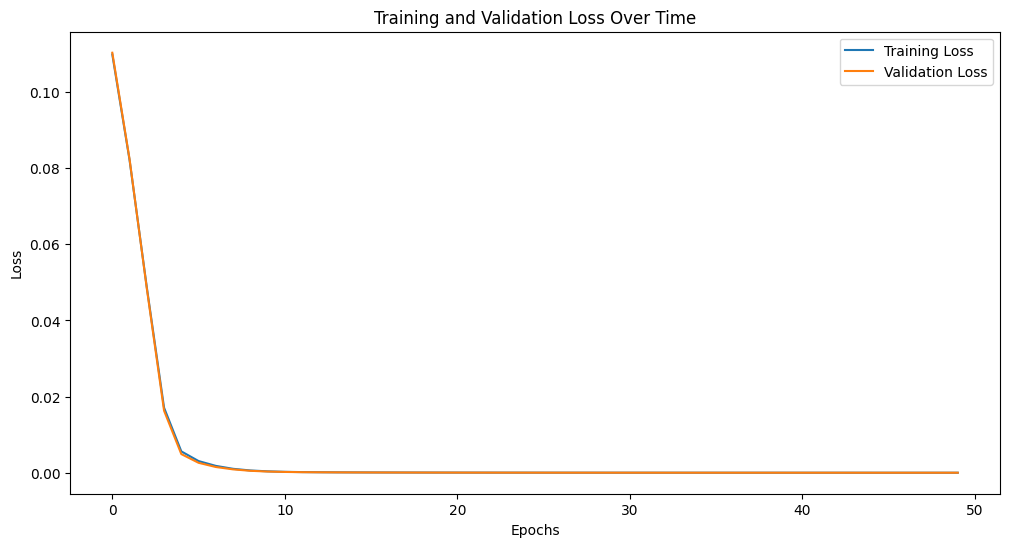

Mean Squared Error: 0.6125031359010402
R^2 Score: -3.7934988401707246


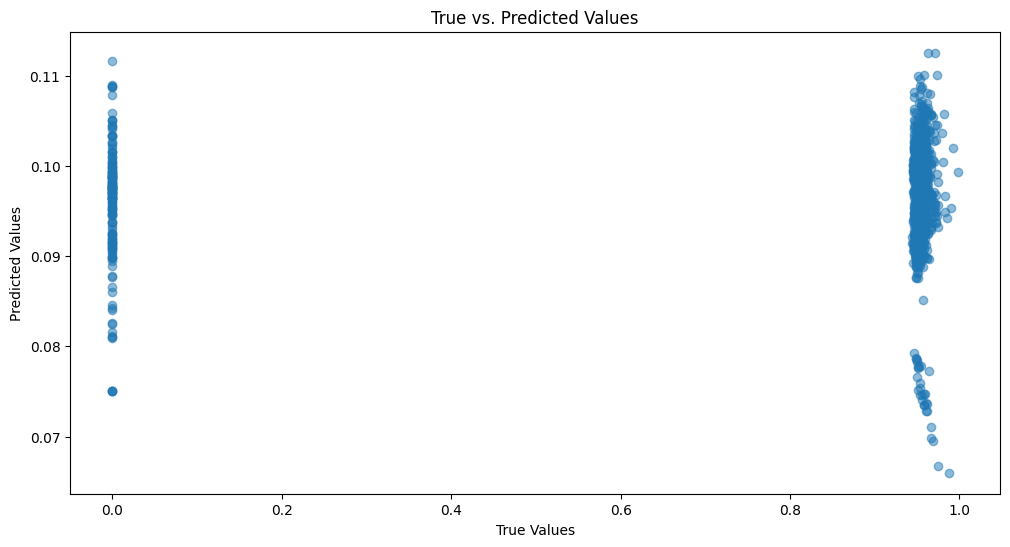

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

best_model = MyRNN(input_size, hidden_size, output_size, num_layers)
best_model.load_state_dict(torch.load(best_model_path1))

best_model.eval()
with torch.no_grad():
    y_pred = best_model(X_test_tensor.unsqueeze(1)).numpy()
    y_true = y_test.values


mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

plt.figure(figsize=(12, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

Model 2 : Optimizer SGD

In [ ]:
class MyRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(MyRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# dataloader creation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
num_layers = 3

model = MyRNN(input_size, hidden_size, output_size, num_layers)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.8)

In [ ]:
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(1))
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()


    model.eval()
    with torch.no_grad():
        train_loss = criterion(model(X_train_tensor.unsqueeze(1)), y_train_tensor)
        val_loss = criterion(model(X_val_tensor.unsqueeze(1)), y_val_tensor)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch 1/50, Training Loss: 0.7045, Validation Loss: 0.7043
Epoch 2/50, Training Loss: 0.6546, Validation Loss: 0.6544
Epoch 3/50, Training Loss: 0.6087, Validation Loss: 0.6086
Epoch 4/50, Training Loss: 0.5666, Validation Loss: 0.5666
Epoch 5/50, Training Loss: 0.5278, Validation Loss: 0.5278
Epoch 6/50, Training Loss: 0.4922, Validation Loss: 0.4922
Epoch 7/50, Training Loss: 0.4595, Validation Loss: 0.4595
Epoch 8/50, Training Loss: 0.4293, Validation Loss: 0.4294
Epoch 9/50, Training Loss: 0.4017, Validation Loss: 0.4018
Epoch 10/50, Training Loss: 0.3764, Validation Loss: 0.3765
Epoch 11/50, Training Loss: 0.3532, Validation Loss: 0.3534
Epoch 12/50, Training Loss: 0.3320, Validation Loss: 0.3322
Epoch 13/50, Training Loss: 0.3126, Validation Loss: 0.3128
Epoch 14/50, Training Loss: 0.2949, Validation Loss: 0.2951
Epoch 15/50, Training Loss: 0.2787, Validation Loss: 0.2789
Epoch 16/50, Training Loss: 0.2640, Validation Loss: 0.2643
Epoch 17/50, Training Loss: 0.2506, Validation Lo

In [ ]:
# saving model weights
best_model_path = 'best_model_weights2.pth'
torch.save(model.state_dict(), best_model_path)

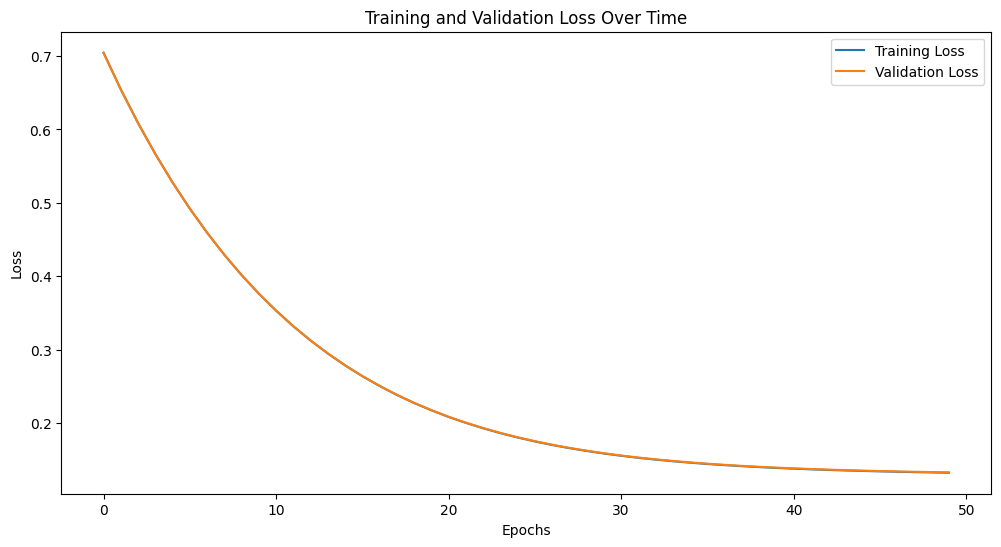

Mean Squared Error: 0.12611645122588813
R^2 Score: 0.013002501957123824


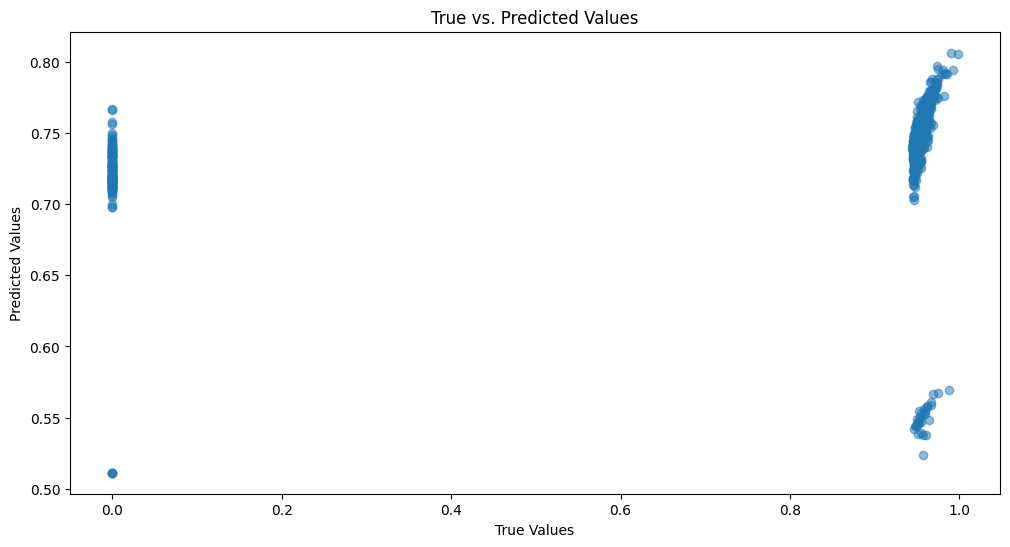

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

best_model = MyRNN(input_size, hidden_size, output_size, num_layers)
best_model.load_state_dict(torch.load(best_model_path))

best_model.eval()
with torch.no_grad():
    y_pred = best_model(X_test_tensor.unsqueeze(1)).numpy()

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

plt.figure(figsize=(12, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

Model 3 : 5 layers

In [ ]:
class MyRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(MyRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# dataloader creation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
num_layers = 5

model = MyRNN(input_size, hidden_size, output_size, num_layers)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [ ]:
# saving model weight
best_model_path = 'best_model_weights3.pth'
torch.save(model.state_dict(), best_model_path)

In [ ]:
num_epochs = 50
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(1))
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()


    model.eval()
    with torch.no_grad():
        train_loss = criterion(model(X_train_tensor.unsqueeze(1)), y_train_tensor)
        val_loss = criterion(model(X_val_tensor.unsqueeze(1)), y_val_tensor)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch 1/50, Training Loss: 0.5948, Validation Loss: 0.5944
Epoch 2/50, Training Loss: 0.4470, Validation Loss: 0.4468
Epoch 3/50, Training Loss: 0.3123, Validation Loss: 0.3121
Epoch 4/50, Training Loss: 0.2078, Validation Loss: 0.2077
Epoch 5/50, Training Loss: 0.1476, Validation Loss: 0.1477
Epoch 6/50, Training Loss: 0.1257, Validation Loss: 0.1258
Epoch 7/50, Training Loss: 0.1198, Validation Loss: 0.1199
Epoch 8/50, Training Loss: 0.1170, Validation Loss: 0.1171
Epoch 9/50, Training Loss: 0.1145, Validation Loss: 0.1146
Epoch 10/50, Training Loss: 0.1117, Validation Loss: 0.1117
Epoch 11/50, Training Loss: 0.1085, Validation Loss: 0.1085
Epoch 12/50, Training Loss: 0.1049, Validation Loss: 0.1048
Epoch 13/50, Training Loss: 0.1008, Validation Loss: 0.1006
Epoch 14/50, Training Loss: 0.0959, Validation Loss: 0.0956
Epoch 15/50, Training Loss: 0.0902, Validation Loss: 0.0898
Epoch 16/50, Training Loss: 0.0836, Validation Loss: 0.0831
Epoch 17/50, Training Loss: 0.0758, Validation Lo

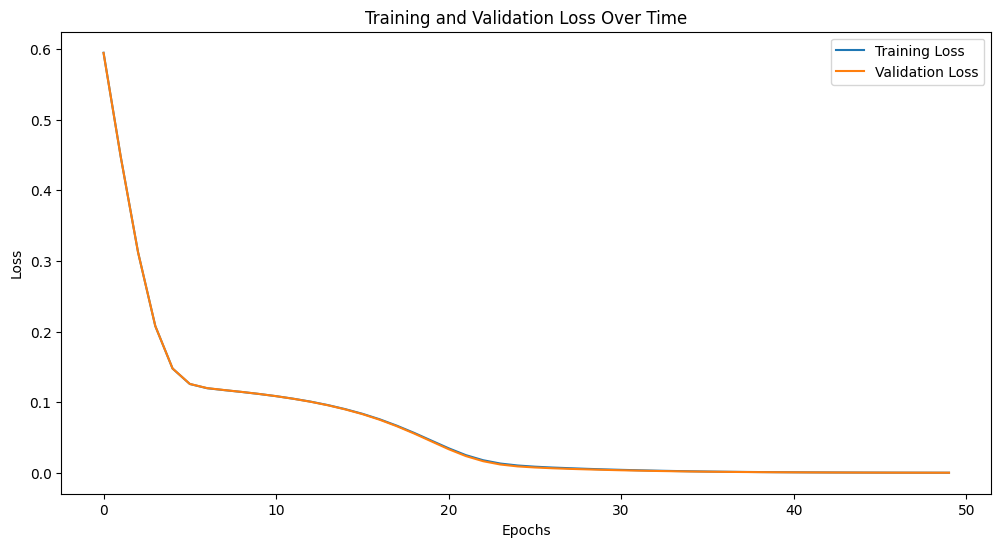

Mean Squared Error: 0.7650202793003608
R^2 Score: -4.9871102800783795


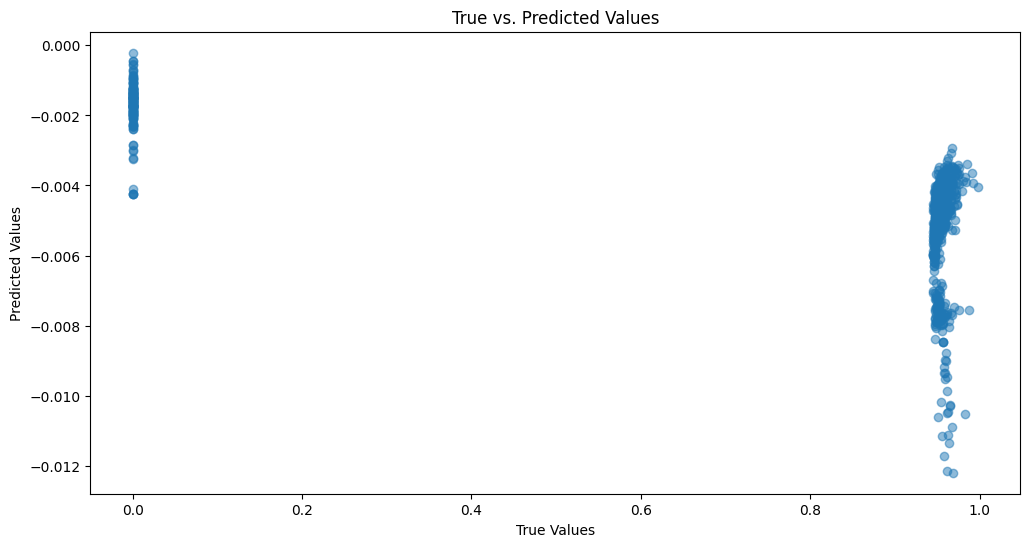

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

best_model = MyRNN(input_size, hidden_size, output_size, num_layers)
best_model.load_state_dict(torch.load(best_model_path))

best_model.eval()
with torch.no_grad():
    y_pred = best_model(X_test_tensor.unsqueeze(1)).numpy()

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

plt.figure(figsize=(12, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()